# Cluster Analysis

In [1]:
import sys
import pandas as pd
sys.path.append("../")
from mwdata.core.cluster import cluster
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

## Load sklearn dataset

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df = pd.concat([pd.Series(data.target), df], axis=1)
df = df.rename({0:'Target'}, axis=1)

## Default Cluster Analysis

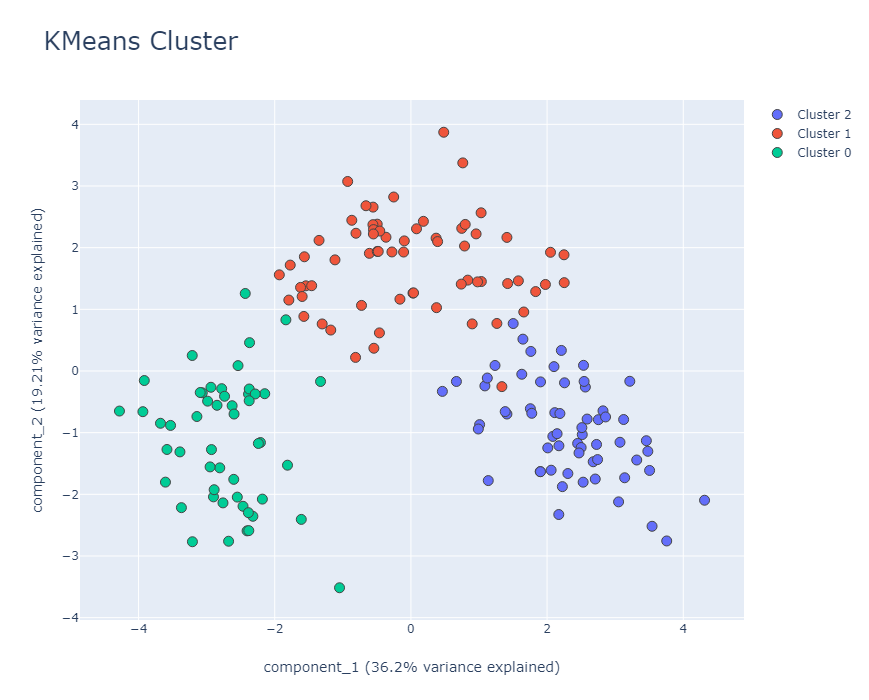

In [3]:
cluster(df, target='Target')

## Return Elbow Plot for K-Means

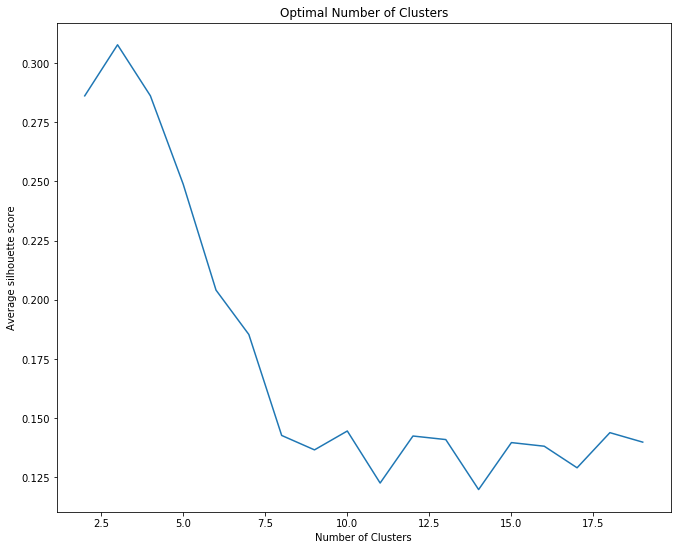

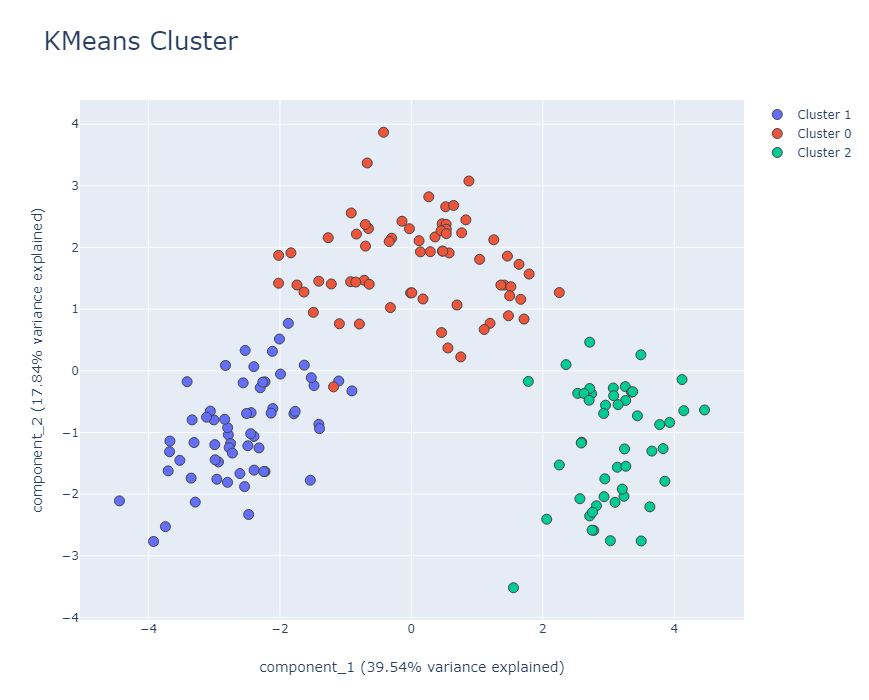

In [4]:
cluster(df, elbow=True)

## Return Reduced Data with Cluster Labels

In [5]:
cluster(df, return_value='reduc').head()

,component_1,component_2,cluster
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1


## Return Data with Cluster Labels

In [6]:
cluster(df, return_value='data').head()

,Target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


## Return Plotly object

In [7]:
plotly_object = cluster(df, return_value='plot')

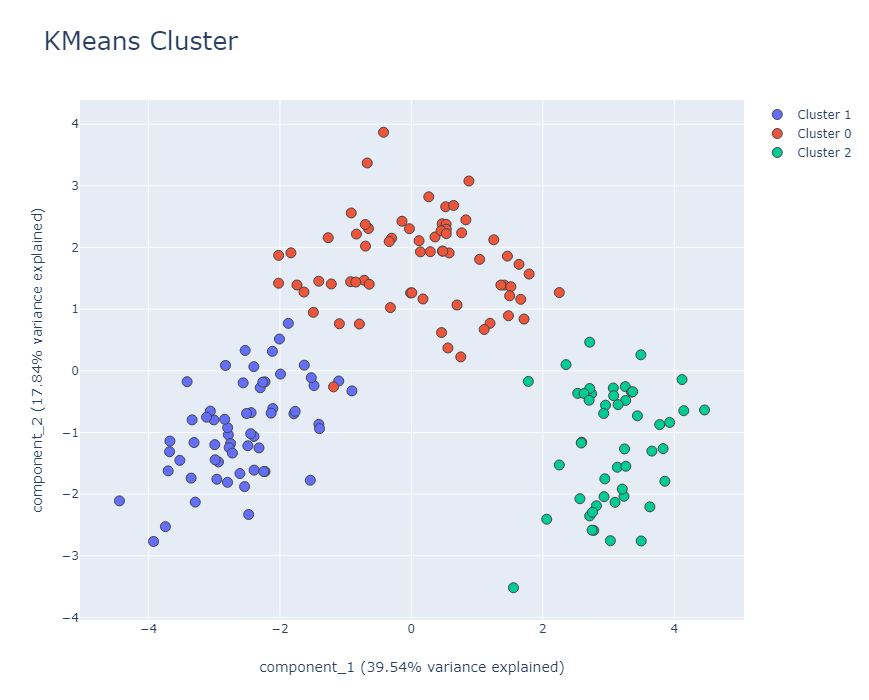

In [8]:
iplot(plotly_object)

## KMeans - Selecting number of clusters

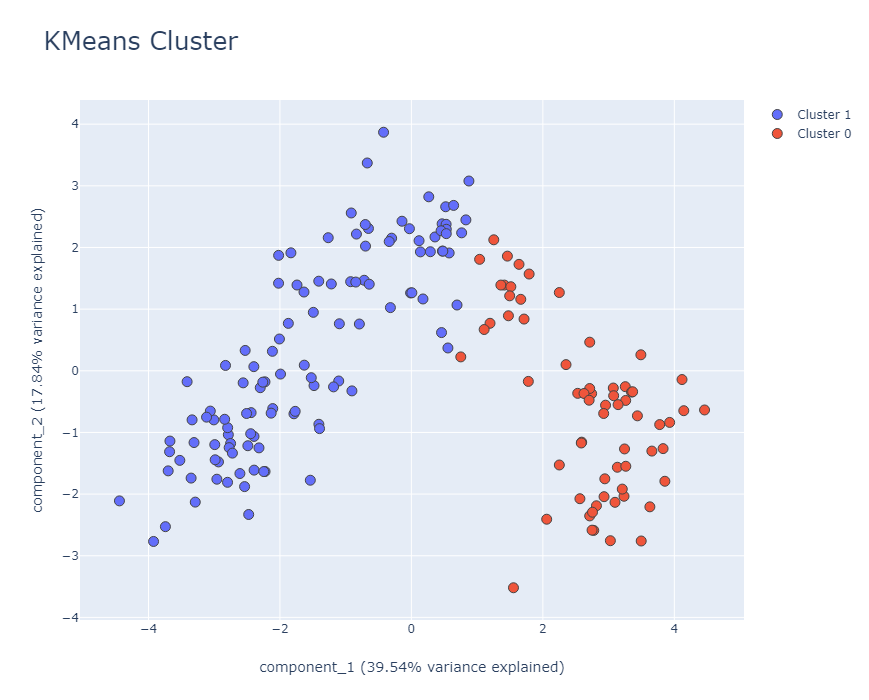

In [9]:
cluster(df, kwargs={'n_clusters':2})

## KMeans static plot using a different metric for optimal clusters

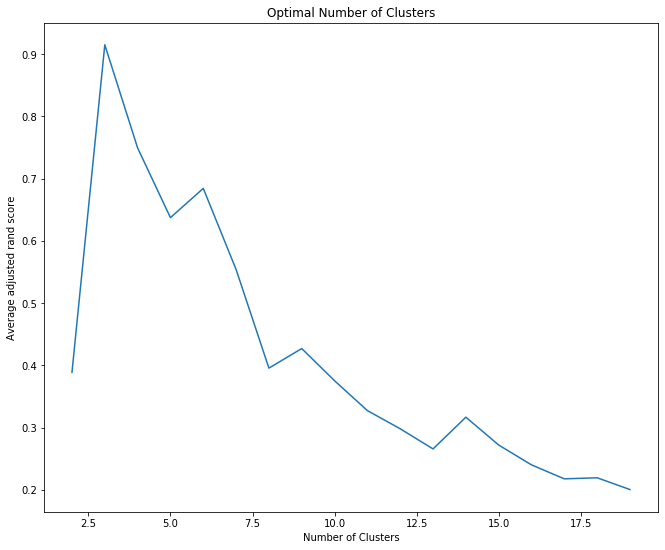

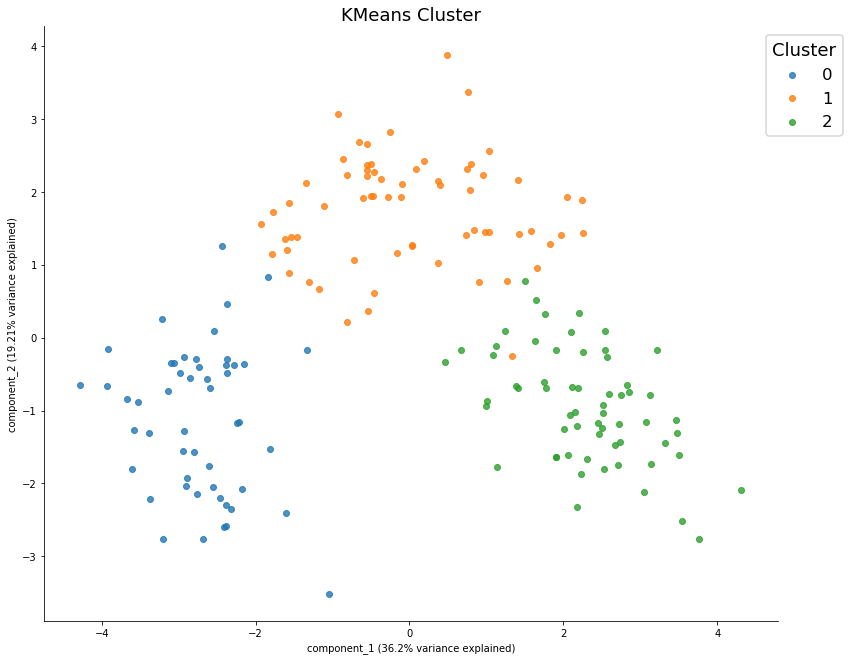

In [10]:
cluster(df, target='Target', interactive=False, elbow=True, analysis='adjusted_rand_score')

## HDBSCAN with t-SNE selected


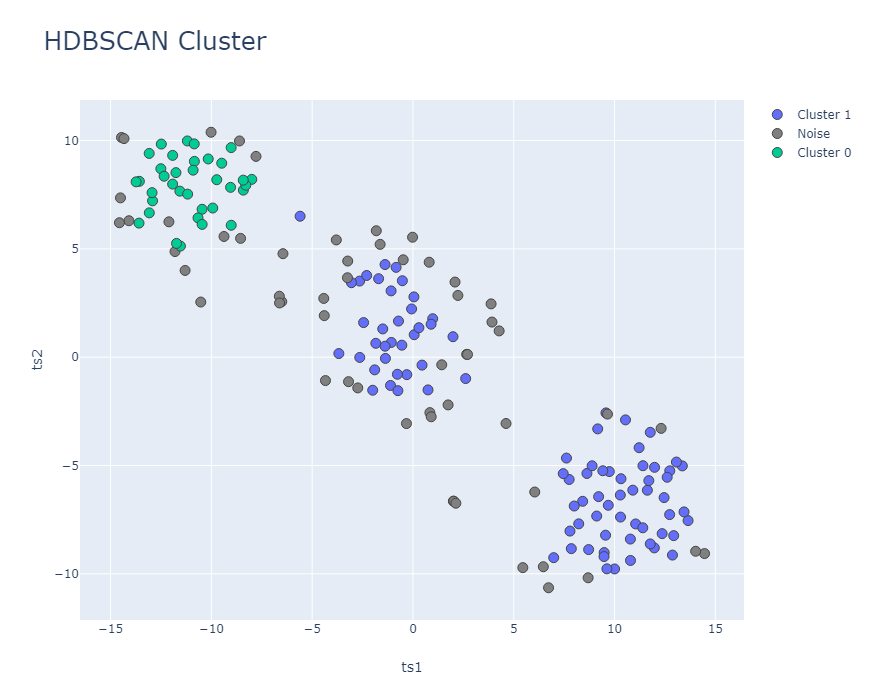

In [11]:
cluster(df, method='HDBSCAN', dim_method='tsne')